# K-Space operations

In this Notebook, we will explore some basic properties of K-Space.

## Initialization

The following code imports the required packages, the dataset that we will be using, and shows the image.

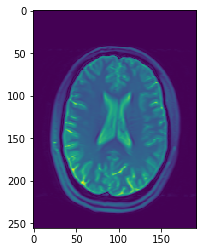

In [90]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
ima = np.load('mrimage.npy')
plt.imshow(ima)

The image is a Fourier pair with its K-Space

$\text{Image} \overset{\mathcal{F}}{\leftrightarrow} \text{KSpace}$

We can show this here:

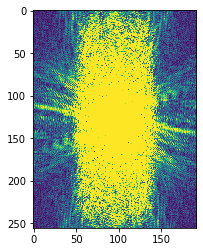

In [91]:
kspace = fftshift(fft2(ima)) # we are using fftshift to put the k-space center in the center of the image
plt.imshow(abs(kspace), vmax = 5000)

Notice how the K-Space has the same dimensions as the image.

Now we can go back using the inverse Fourier transform:

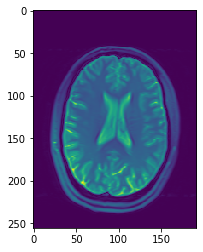

In [92]:
ima2 = abs(ifft2(kspace))
plt.imshow(abs(ima2))

## Undersampling the k-space

Here we show how the image is affected if only the even (odd) lines of k-space are taken. This corresponds to undersampling in K-Space, that is, the step between one phase encoding line and the next has become more coarse.

In [93]:
underSampling = 2 # Change this value for different results!
kspace2 = np.copy(kspace)
kspace2 = kspace2[0::underSampling,:]

This is how the K-Space looks like (notice that, obviously, its size in the vertical direction has halved):

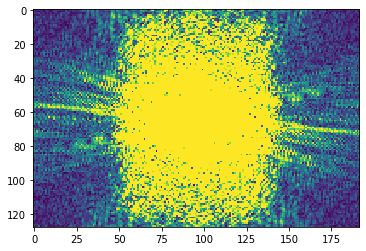

In [94]:
plt.imshow(abs(kspace2), vmax=5000)

And moving back into the image space, we notice that the size of the image has also halved, the field of view is halved too, and aliasing appears:

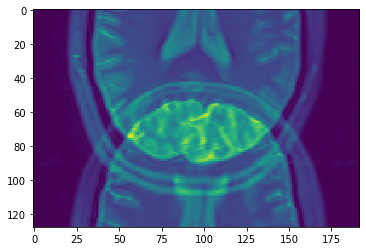

In [95]:
plt.imshow(abs(ifft2(kspace2)))

### Zero-filling

Alternatively, we can set every other line of k-space to zero, instead of removing it. This is called zero-filling the K-Space:

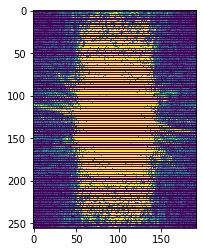

In [96]:
kspace2 = np.zeros(kspace.shape, dtype=np.complex)
kspace2[0::underSampling,:] = kspace[0::underSampling,:]
plt.imshow(abs(kspace2), vmax=5000)

The size of K-Space is the same as the original one, however we multiplied the lines by a comb function:

<StemContainer object of 3 artists>

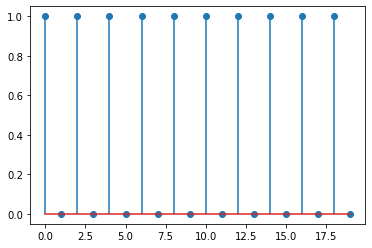

In [97]:
comb = np.zeros(underSampling*10)
comb[0::underSampling] = 1
plt.stem(comb, use_line_collection=True)

Which, in image space, it is equivalent to a convolution by the Fourier transform of that same function. 

<StemContainer object of 3 artists>

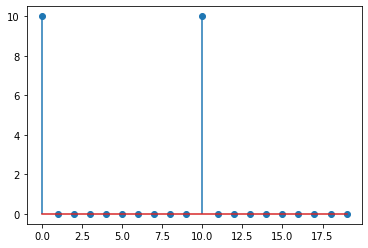

In [98]:
plt.stem(abs(fft(comb)), use_line_collection=True)

As you can notice, the FT has two (or, in general, *underSampling*) peaks, which correspond to two replicas of the image in the image domain:

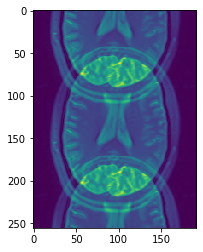

In [99]:
plt.imshow(abs(ifft2(kspace2)))

In this case, the image size is the same as the original, but the field of view is still cropped. We just obtain more replicas of the same information, which is typical of undersampling.

## Cropping the K-Space
The other operation that we can do in K-Space is cropping, that is, we can leave out some portions of K-Space.

In this case, the field of view of the image is unchanged, because it is determined by the phase encoding steps and not the extent of the acquired K-Space.

### Removing the outer regions

The first operation that we will do will be removing the outer regions of k-space:

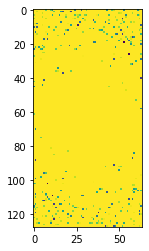

In [111]:
cutLines = 64 # change this value for different results!
kspace2 = np.copy(kspace)
kspace2 = kspace2[cutLines:-cutLines,cutLines:-cutLines]
plt.imshow(abs(kspace2), vmax=5000)

The size of K-Space is reduced, and only the central 128 lines (out of 256) are kept. The image will be a scaled down version of the original:

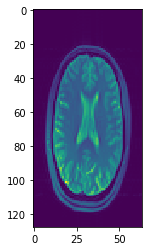

In [101]:
plt.imshow(abs(ifft2(kspace2)))

### Zero-filling

The image size is now changed, so the image is effectively smaller. We can restore the original size by doing a zero-filling, like before:

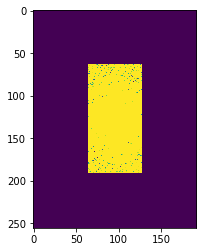

In [102]:
kspace2 = np.copy(kspace)
kspace2[0:cutLines,:] = 0
kspace2[-cutLines:,:] = 0
kspace2[:,0:cutLines] = 0
kspace2[:,-cutLines:] = 0
plt.imshow(abs(kspace2), vmax=5000)

As we know, the outer regions of K-Space contain the information of the high spatial frequencies. The resulting image will be a reduced-resolution version of the original one:

Text(0.5, 1.0, 'Original image')

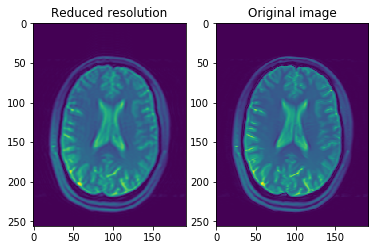

In [103]:
plt.subplot(121)
plt.imshow(abs(ifft2(kspace2)))
plt.title("Reduced resolution")
plt.subplot(122)
plt.imshow(abs(ifft2(kspace)))
plt.title("Original image")

Here's the difference of the two images:

Text(0.5, 1.0, 'Difference')

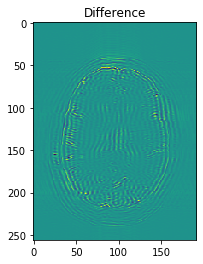

In [104]:
plt.imshow(abs(ifft2(kspace2)) - abs(ifft2(kspace)))
plt.title("Difference")

## Removing the center of K-Space

The center of K-Space contains information about the lower spatial frequencies, i.e. the contrast of the image.

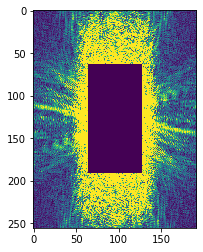

In [105]:
kspace2 = np.copy(kspace)
kspace2[cutLines:-cutLines,cutLines:-cutLines] = 0
plt.imshow(abs(kspace2), vmax=5000)

The corresponding image will be the following:

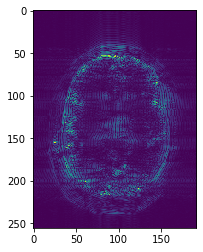

In [106]:
plt.imshow(abs(ifft2(kspace2)))

This is the end of our tutorial on K-Space. If you would like to play with different options, you can first try changing the variable of the "cutLines" variable above, to remove smaller or larger portions of K-Space.